<a href="https://colab.research.google.com/github/mohammadsinanemati/mohammadsinanemati/blob/main/HW1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q2-PART I
خوانده میشود loadmat فرمت فایل دانلود شده به صورت متلب است که با دستور


In [13]:

!gdown 1FHwudMJlQP3ICezgVptyxe2gLDcg8brF



Downloading...
From (original): https://drive.google.com/uc?id=1FHwudMJlQP3ICezgVptyxe2gLDcg8brF
From (redirected): https://drive.google.com/uc?id=1FHwudMJlQP3ICezgVptyxe2gLDcg8brF&confirm=t&uuid=c8113739-891a-418d-b58b-e91b8ccbbd9b
To: /content/109.mat
100% 3.90M/3.90M [00:00<00:00, 127MB/s]


soaldovom

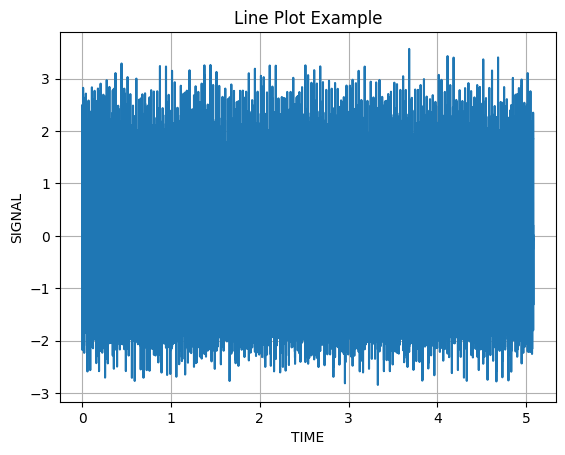

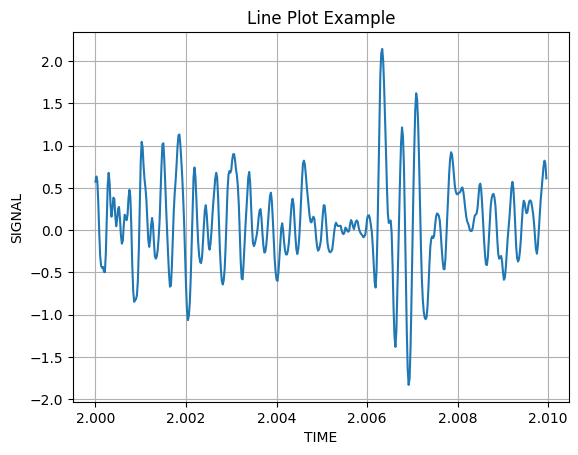

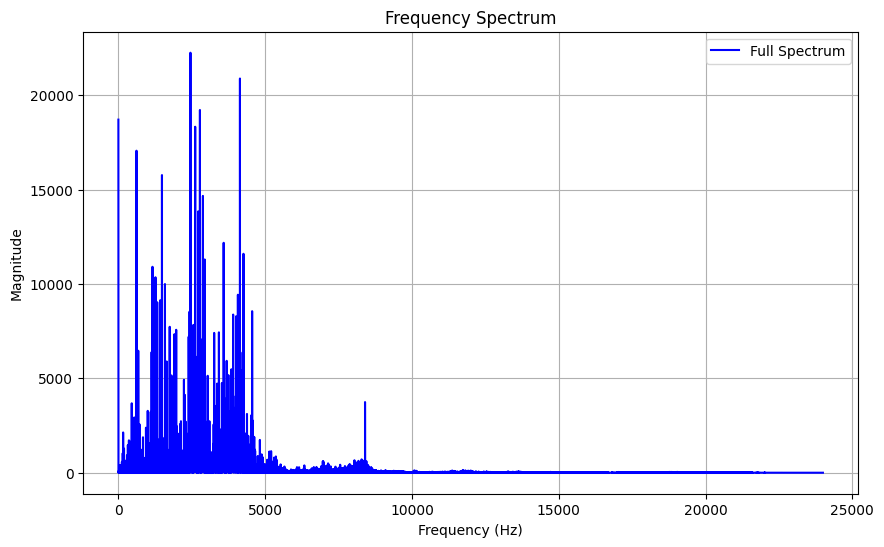

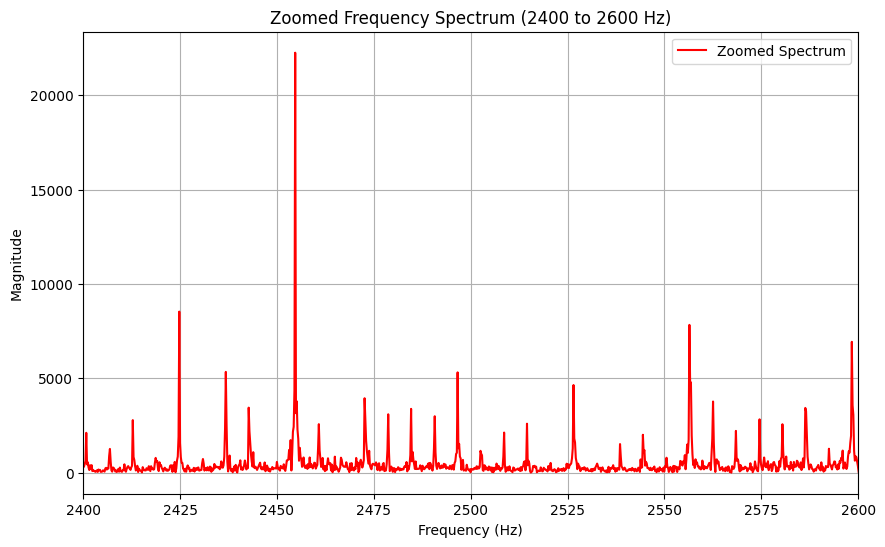

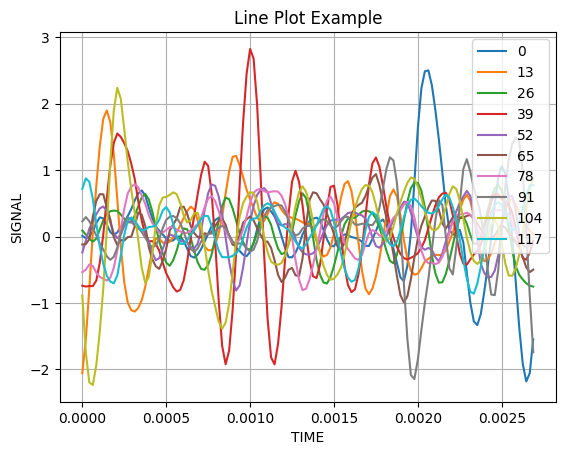

In [14]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = loadmat("109.mat")
df = np.array(data['X109_DE_time'])
f = []
for i in df:
    f.append(i[0])
plt.plot([i/48000 for i in range(len(df))], f)
plt.xlabel("TIME")
plt.ylabel("SIGNAL")
plt.title("Line Plot Example")
plt.grid(True)
plt.show()
#چون فرکانس را ۴۸ هزار در نظر گرفتیم و ما ۴۸ هزار نمونه داریم
#تمام این نمونه 10 ثانیه خواهد شد

start=2*48000
end = 2.01*48000
plt.plot([i/48000 for i in range(start, int(end))] , f[start:int(end)])
plt.xlabel("TIME")
plt.ylabel("SIGNAL")
plt.title("Line Plot Example")
plt.grid(True)
plt.show()


#ج


def plot_frequency_spectrum(signal, sampling_rate):
    fft_result = np.fft.fft(signal)
    n = len(signal)
    frequencies = np.fft.fftfreq(n, d=1/sampling_rate)
    magnitude = np.abs(fft_result)
    positive_frequencies = frequencies[:n//2]
    positive_magnitude = magnitude[:n//2]
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_magnitude, color='blue', label="Full Spectrum")
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.legend()
    plt.show()
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_magnitude, color='red', label="Zoomed Spectrum")
    plt.title("Zoomed Frequency Spectrum (2400 to 2600 Hz)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(2400, 2600)
    plt.grid()
    plt.legend()
    plt.show()

data = loadmat('109.mat')
signal = data['X109_DE_time'].flatten()
sampling_rate = 48000
plot_frequency_spectrum(signal, sampling_rate)
# در این نمودار، فرکانس‌هایی که بالاترین دامنه را دارند، پیک‌های اصلی را ایجاد می‌کنند.
ا #ز این نمودار، واضح است که فرکانس غالب تقریباً در محدوده بین 2000 تا 5000 هرتز قرار دارد، با یک پیک مشخص که در حدود 4000 هرتز دیده می‌شود.
#این می‌تواند به شما کمک کند که بفهمید که چه فرکانس‌هایی بیشتر در سیگنال برجسته هستند.

#

Bookmark message
Copy message




#د

lst = []
for i in range(0, int(len(f)/128)*128, 128):
    lst.append(f[i:130+i])

l = np.array(lst)
p = pd.DataFrame(l)

for i in range(10):
    plt.plot([j/48000 for j in range(130)], p.iloc[i], label = i*13)
plt.xlabel("TIME")
plt.ylabel("SIGNAL")
plt.title("Line Plot Example")
plt.grid(True)
plt.legend()
plt.show()



def feature_extraction(signal):
    return (signal.mean(), signal.std(), ((signal**2).mean())**(0.5))

means = []
standard_deviations = []
RMSs = []
for i in range(1905):
    (a,b,c) = feature_extraction(p.iloc[i])
    means.append(a)
    standard_deviations.append(b)
    RMSs.append(c)

df = pd.DataFrame({"mean" : means, "standard deviation" : standard_deviations, "RMS" : RMSs})

df.to_csv("data.csv", index=False)
#شکل آرایه فریم ها: (7596، 128)


soal svom iris datasheat


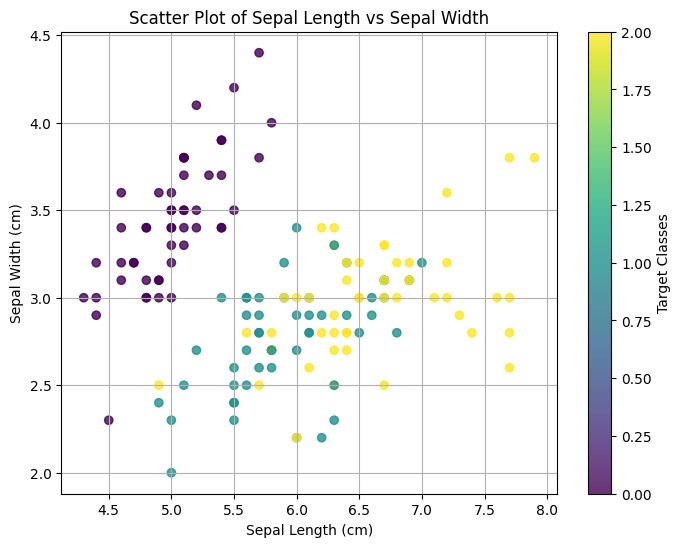

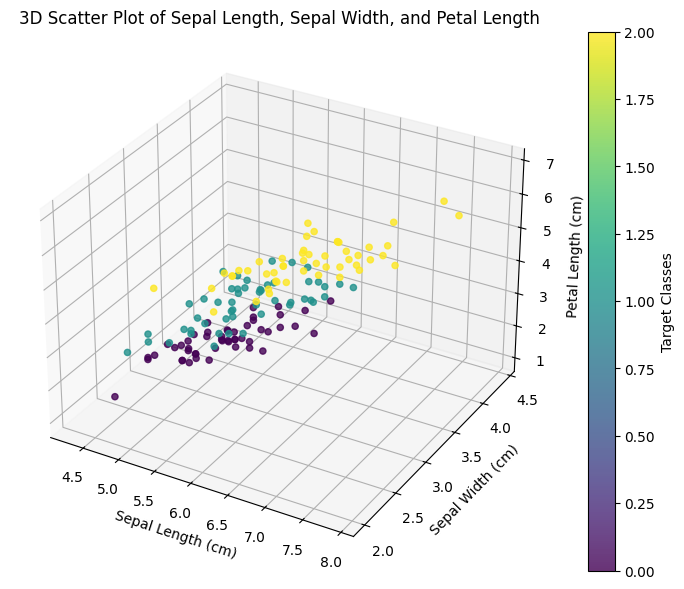

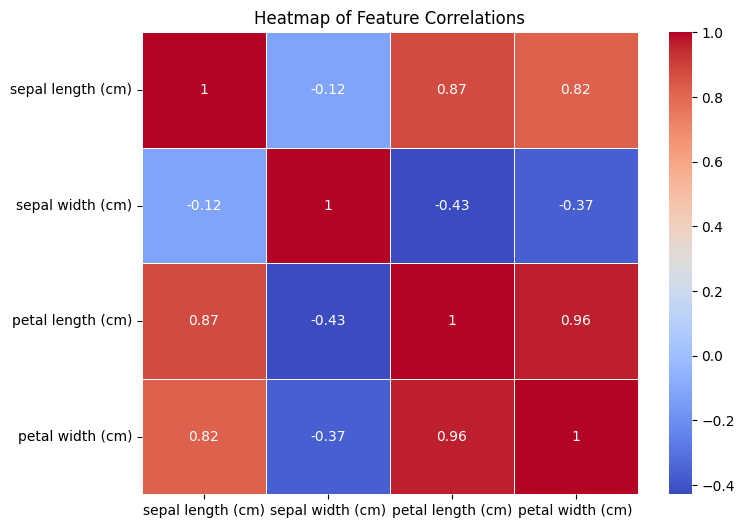

Seaborn Version: 0.13.2


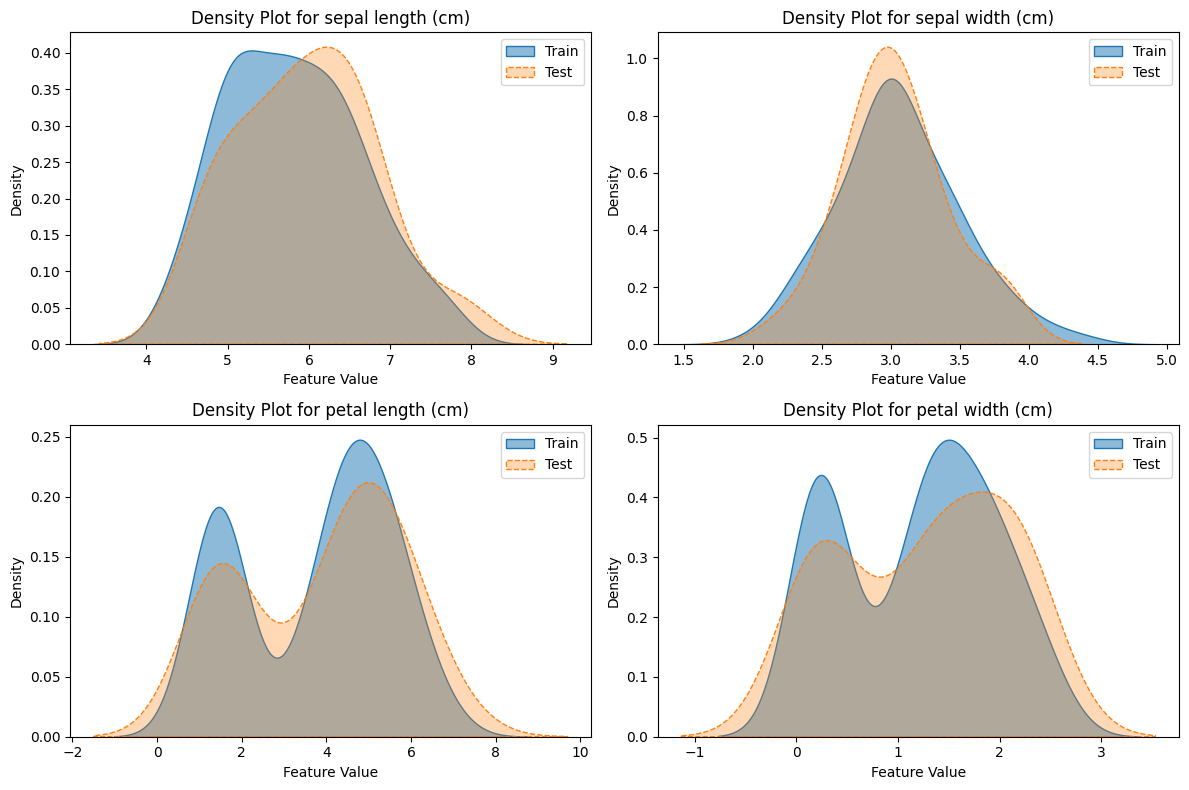

   sepal length (cm) sepal_length_category
0                5.1                 cotah
1                4.9                 cotah
2                4.7                 cotah
3                4.6                 cotah
4                5.0                 cotah
5                5.4                 cotah
6                4.6                 cotah
7                5.0                 cotah
8                4.4                 cotah
9                4.9                 cotah
           target
count  150.000000
mean     1.000000
std      0.819232
min      0.000000
25%      0.000000
50%      1.000000
75%      2.000000
max      2.000000


In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

# a2
iris = load_iris()
x = iris.data
y = iris.target

# a3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# a4
columns = iris.feature_names
x_train = pd.DataFrame(x_train, columns=columns)
x_test = pd.DataFrame(x_test, columns=columns)
y_train = pd.DataFrame({'target': y_train})
y_test = pd.DataFrame({'target': y_test})
x_train['data_type'] = 'train'
x_test['data_type'] = 'test'

# a5
x_total = pd.concat([x_train, x_test])
y_total = pd.concat([y_train, y_test])
x_total['target'] = y_total.values

# b1
plt.figure(figsize=(8, 6))
plt.scatter(
    x_total['sepal length (cm)'],
    x_total['sepal width (cm)'],
    c=x_total['target'], cmap='viridis', alpha=0.8
)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.colorbar(label="Target Classes")
plt.grid(True)
plt.show()

# b2
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    x_total['sepal length (cm)'],
    x_total['sepal width (cm)'],
    x_total['petal length (cm)'],
    c=x_total['target'], cmap='viridis', alpha=0.8
)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatter Plot of Sepal Length, Sepal Width, and Petal Length')
fig.colorbar(sc, label="Target Classes")
plt.show()

# b3
df = pd.DataFrame(iris.data, columns=iris.feature_names)
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

# b4
X = iris.data
y = iris.target
feature_names = iris.feature_names
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)
df_train = pd.DataFrame(X_train, columns=feature_names)
df_test = pd.DataFrame(X_test, columns=feature_names)
print("Seaborn Version:", sns.__version__)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, feature in enumerate(feature_names):
    try:
        sns.kdeplot(df_train[feature], label="Train", fill=True, alpha=0.5, ax=axes[i])
        sns.kdeplot(df_test[feature], label="Test", fill=True, alpha=0.3, linestyle="--", ax=axes[i])
        axes[i].set_title(f"Density Plot for {feature}")
        axes[i].set_xlabel("Feature Value")
        axes[i].set_ylabel("Density")
        axes[i].legend()
    except Exception as e:
        print(e)
plt.tight_layout()
plt.show()

# c
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sepal_length = df['sepal length (cm)']
bins = [sepal_length.min(), 5.5, 6.5, sepal_length.max()]  # تقسیم به سه کلاس
labels = ['cotah', 'motevaset', 'boland']
df['sepal_length_category'] = pd.cut(sepal_length, bins=bins, labels=labels, include_lowest=True)
print(df[['sepal length (cm)', 'sepal_length_category']].head(10))

# d
print(y_total.describe())